In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pysal
import seaborn as sns


In [4]:
np.random.seed(10)
tag = 'fcn_1'

# toy function (we will assume this is a black box) -- this is where real data would be imported
def get_stiff(X):
	num_pts = X.shape[0]	
	# fcn_1 
	y =  np.sin(X[:,0])*np.sin(X[:,1]) + 1.0/10.0*X[:,0]**2.0 + np.random.normal(0,2,num_pts) + 100
	# fcn 2 
	#y = np.random.normal(0,50,num_pts) + 200 
	# fcn 3
	#y = (X[:,0] - 5.0)**2.0 + (X[:,1] - 5.0)**2.0 + np.random.normal(0,5,num_pts) + 50 + .15*X[:,0]*X[:,1]
	return y


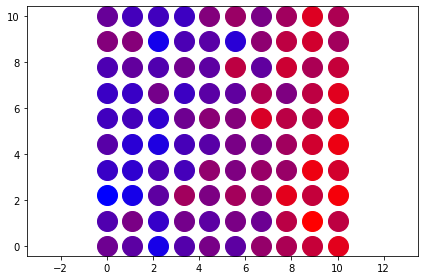

In [6]:
# get and plot data
# --> grid 
x1 = np.linspace(0,10,10)
x2 = np.linspace(0,10,10)
xv, yv = np.meshgrid(x1, x2)
num_pts = xv.shape[0]*xv.shape[1]
X = np.zeros((num_pts,2))
X[:,0] = np.reshape(xv,(-1,1))[:,0]
X[:,1] = np.reshape(yv,(-1,1))[:,0]

y = get_stiff(X)

plt.figure()
mi = np.min(y)
ma = np.max(y)

for kk in range(0,X.shape[0]):
	val = (y[kk] - mi) / (ma - mi)
	plt.plot(X[kk,0],X[kk,1],'o',color=(val, 0, 1.0 - val),markersize=20)

ax = plt.gca()
ax.axis('equal')
plt.tight_layout()
plt.savefig(tag + '_stiffness_distribution')

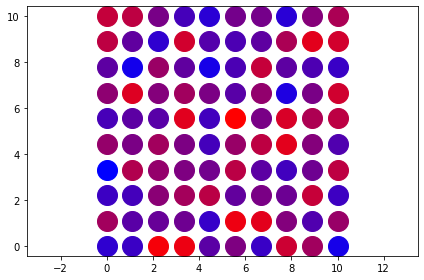

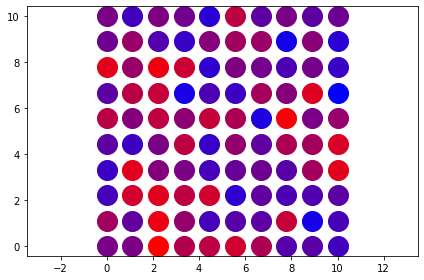

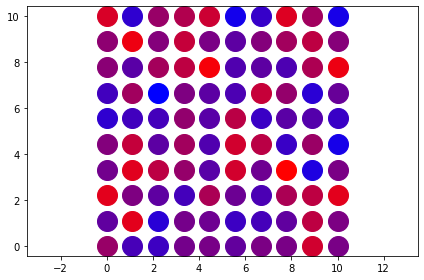

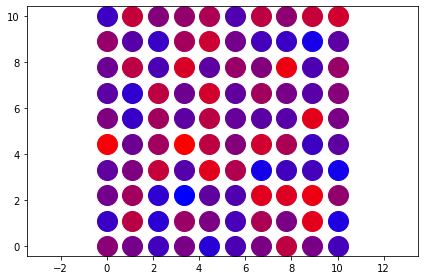

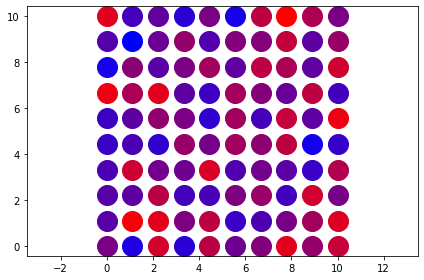

In [7]:
# plot permutations
for jj in range(0,5):
	#### illustrate random shuffles
	per = np.random.permutation(num_pts)
	X_perm = X
	y_perm = y[per]

	plt.figure()


	for kk in range(0,X.shape[0]):
		val = (y_perm[kk] - mi) / (ma - mi)
		plt.plot(X_perm[kk,0],X_perm[kk,1],'o',color=(val, 0, 1.0 - val),markersize=20)

	ax = plt.gca()
	ax.axis('equal')
	plt.tight_layout()
	plt.savefig(tag + '_stiffness_distribution_permute_' + str(jj))

I: 0.7060146267318752
p value: 0.001


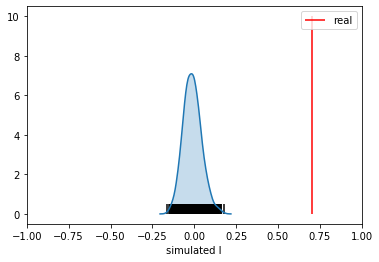

In [8]:
# get the weights -- essentially says which points are touching each other
thresh = 2 #change thresh to get different types of weight matrix (queen vs. rook)
# weights don't have to be based on distance! many options
weights_distance = pysal.weights.DistanceBand.from_array(X, thresh)

# compute Moran's I 
mo =  pysal.Moran(y,weights_distance)
I = mo.I
print('I:',I)
p = mo.p_sim # pvalue 
print('p value:', p)
sim = mo.sim

# visualize 
plt.figure()
sns.kdeplot(sim, shade=True)
plt.vlines(sim, 0, 0.5)
plt.vlines(I, 0, 10, 'r',label='real')
plt.xlim([-1.0, 1.0])
plt.legend()
plt.xlabel('simulated I')
plt.savefig(tag + '_I_plot')